### Problem Statement:  Classify raisins into one of the two categories,
1. Kecimen
1. Besni

### Dataset Citation
This dataset is used under citation guidelines from the original authors. For detailed study and dataset description, see the following references:

- **Citation**: Cinar, I., Koklu, M., & Tasdemir, S. (2020). Classification of Raisin Grains Using Machine Vision and Artificial Intelligence Methods. *Gazi Journal of Engineering Sciences, 6*(3), 200-209. DOI: [10.30855/gmbd.2020.03.03](https://doi.org/10.30855/gmbd.2020.03.03)
- **Dataset available at**: [Murat Koklu's Dataset Page](https://www.muratkoklu.com/datasets/)
- **Article download**: [DergiPark](https://dergipark.org.tr/tr/download/article-file/1227592)


In [3]:
import pandas as pd

df = pd.read_excel("Raisin_Dataset.xlsx")
df.sample(5)

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
265,78883,395.100097,256.964966,0.759610,80973,0.678447,1092.709,Kecimen
54,111450,478.310971,298.630592,0.781150,113256,0.690093,1298.188,Kecimen
592,128574,601.800235,276.248155,0.888418,135975,0.674002,1508.934,Besni
75,50570,311.344795,208.317898,0.743181,51743,0.720863,873.777,Kecimen
850,104468,542.178172,250.063079,0.887286,108119,0.646933,1360.497,Besni


In [4]:
df.shape

(900, 8)

In [7]:
df.describe()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,87804.127778,430.929950,254.488133,0.781542,91186.090000,0.699508,1165.906636
std,39002.111390,116.035121,49.988902,0.090318,40769.290132,0.053468,273.764315
min,25387.000000,225.629541,143.710872,0.348730,26139.000000,0.379856,619.074000
25%,59348.000000,345.442898,219.111126,0.741766,61513.250000,0.670869,966.410750
50%,78902.000000,407.803951,247.848409,0.798846,81651.000000,0.707367,1119.509000
75%,105028.250000,494.187014,279.888575,0.842571,108375.750000,0.734991,1308.389750
max,235047.000000,997.291941,492.275279,0.962124,278217.000000,0.835455,2697.753000


In [9]:
df.isnull().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

### Train Test Split

In [11]:
X = df[["Area", "MajorAxisLength", "MinorAxisLength", "Eccentricity", "ConvexArea", "Extent", "Perimeter"]]
y = df["Class"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

## Scaling

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()         
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [20]:
X_train_scaled

array([[ 0.9531725 ,  0.38849113,  1.79100179, ...,  1.03729448,
        -1.40859789,  1.36594862],
       [ 1.39153009,  0.30663321,  2.80882493, ...,  1.31793802,
         0.94345174,  0.90601714],
       [ 0.07872069,  0.00387698,  0.29301415, ...,  0.03382983,
        -0.13237134, -0.02320567],
       ...,
       [ 1.90157823,  1.37654143,  1.90004675, ...,  1.83167362,
         0.08831091,  1.62914584],
       [-0.87362688, -0.69496652, -1.13039876, ..., -0.87783644,
        -0.82717271, -0.87115178],
       [-0.2488586 , -0.32582005,  0.02917885, ..., -0.27006703,
        -0.40402733, -0.28495985]])

## Train SVM with RBF kernel : No scaling

In [28]:
from sklearn.svm import SVC

# model = SVC(kernel='rbf', gamma=0.5, C=1)
model = SVC(kernel='rbf')
model.fit(X_train, y_train)



,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [29]:
y_pred = model.predict(X_test)
from sklearn.metrics import classification_report
report = classification_report(y_test,y_pred)
print(report)
model.n_iter_

              precision    recall  f1-score   support

       Besni       0.86      0.75      0.80        83
     Kecimen       0.81      0.90      0.85        97

    accuracy                           0.83       180
   macro avg       0.83      0.82      0.82       180
weighted avg       0.83      0.83      0.83       180



array([229], dtype=int32)

## Train SVM with RBF kernel :with scaling

In [25]:
from sklearn.svm import SVC

# model = SVC(kernel='rbf', gamma=0.5, C=1)
model = SVC(kernel='rbf')
model.fit(X_train_scaled, y_train)



,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


## Evaluate

In [26]:
y_pred = model.predict(X_test_scaled)
from sklearn.metrics import classification_report
report = classification_report(y_test,y_pred)
print(report)
model.n_iter_

              precision    recall  f1-score   support

       Besni       0.91      0.83      0.87        83
     Kecimen       0.87      0.93      0.90        97

    accuracy                           0.88       180
   macro avg       0.89      0.88      0.88       180
weighted avg       0.88      0.88      0.88       180



array([382], dtype=int32)

## Train SVM with linear kernel:No scaling

In [15]:
from sklearn.svm import SVC

model= SVC(kernel="linear")
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
from sklearn.metrics import classification_report
report = classification_report(y_test,y_pred)
print(report)
model.n_iter_

              precision    recall  f1-score   support

       Besni       0.91      0.88      0.90        83
     Kecimen       0.90      0.93      0.91        97

    accuracy                           0.91       180
   macro avg       0.91      0.90      0.90       180
weighted avg       0.91      0.91      0.91       180



array([85005907], dtype=int32)

## Train SVM with linear kernel: with scaling

In [31]:
from sklearn.svm import SVC

model= SVC(kernel="linear")
model.fit(X_train_scaled,y_train)

y_pred = model.predict(X_test_scaled)
from sklearn.metrics import classification_report
report = classification_report(y_test,y_pred)
print(report)
model.n_iter_

              precision    recall  f1-score   support

       Besni       0.90      0.84      0.87        83
     Kecimen       0.87      0.92      0.89        97

    accuracy                           0.88       180
   macro avg       0.88      0.88      0.88       180
weighted avg       0.88      0.88      0.88       180



array([1214], dtype=int32)

## linear kernel has high memory usage and power compare to rbf even if acccuarcy better so not recommendable

## Let's use now pipeline api to write the same code with short line 

In [36]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scale',StandardScaler()),
    ('svc',SVC(kernel="rbf")),
])

In [37]:
pipeline.fit(X_train,y_train)
y_pred = pipeline.predict(X_test)
from sklearn.metrics import classification_report
report = classification_report(y_test,y_pred)
print(report)
model.n_iter_

              precision    recall  f1-score   support

       Besni       0.91      0.83      0.87        83
     Kecimen       0.87      0.93      0.90        97

    accuracy                           0.88       180
   macro avg       0.89      0.88      0.88       180
weighted avg       0.88      0.88      0.88       180



array([1214], dtype=int32)

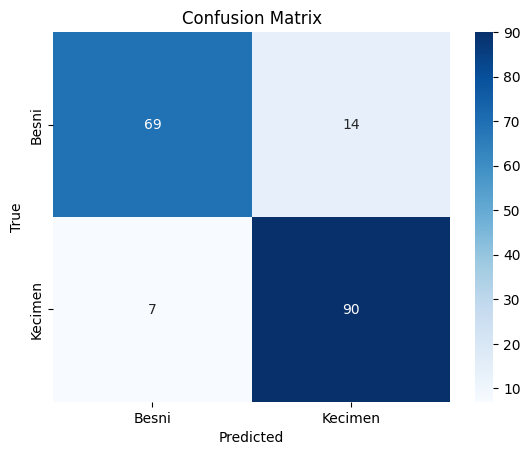

In [40]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Besni', 'Kecimen'], yticklabels=['Besni', 'Kecimen'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')
# plt.show()